<a href="https://colab.research.google.com/github/gunurusreekethana4/sreekethana_INFO5371_SPRING2023/blob/main/sreekethana_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [5]:
# Write your code here
!pip install pyLDAvis 
!pip install ipympl
%matplotlib ipympl




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatibl

In [6]:
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import pandas as pd

nltk.download('stopwords')
stopwordList = nltk.corpus.stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
tweet_df = pd.read_csv('tweet_sentiment_analysis.csv',encoding='ISO-8859-1')

print(tweet_df)

             id                                               text   
0      1.64E+18  Helloooooooooo!!! Anyone there, click in link ...  \
1      1.64E+18  Love is a beautiful dream. - William Sharp (di...   
2      1.64E+18  RT @Sammyybee1: In her Uniqueness Ã°Å¸âÂ¸Ã¢Â...   
3      1.64E+18  RT @EileanIdhe: A busy, but productive day! We...   
4      1.64E+18  RT @petale_le: Le rouge comme lÃ¢â¬â¢express...   
...         ...                                                ...   
10002  1.64E+18  Hello there, friend Do no harm but take no shi...   
10003  1.64E+18  RT @yalisonbp: part 1/2 #errorink #errink #err...   
10004  1.64E+18  The way to inner peace is the way of love.\n\n...   
10005  1.64E+18  Ã Â°âÃ Â°â¢ Ã Â°Â¸Ã Â±ÂÃ Â°Â¤Ã Â±ÂÃ Â°Â°Ã...   
10006  1.64E+18  Ãâ ÃâÃÂÃÂ­ÃÂ»ÃÂ± ÃÂ³ÃÂµÃÂ½ÃÂ½Ã...   

      sentimental analysis  
0                        0  
1                        1  
2                        1  
3                        1  
4             

In [8]:
from nltk.corpus import stopwords
from textblob import TextBlob

def lowerCase(text):
  return text.apply(lambda x: " ".join(x.lower() for x in str(x).split()))

def tokenization(text):
  return text.apply(lambda x: tokenizer.tokenize(x))

def stemming(text):
  return text.apply(lambda x: [stemmer.stem(i) for i in x])

In [9]:
from nltk.corpus import stopwords
from textblob import TextBlob

text = tweet_df['text']
text = lowerCase(text)
text = tokenization(text)
text = stemming(text)
tweet_df['Stemming'] = text
tweet_df

,id,text,sentimental analysis,Stemming
0,1.64E+18,"Helloooooooooo!!! Anyone there, click in link ...",0,"[helloooooooooo, anyon, there, click, in, link..."
1,1.64E+18,Love is a beautiful dream. - William Sharp (di...,1,"[love, is, a, beauti, dream, william, sharp, d..."
2,1.64E+18,RT @Sammyybee1: In her Uniqueness Ã°Å¸âÂ¸Ã¢Â...,1,"[rt, sammyybee1, in, her, uniqu, ã, å, â, â, ã..."
3,1.64E+18,"RT @EileanIdhe: A busy, but productive day! We...",1,"[rt, eileanidh, a, busi, but, product, day, we..."
4,1.64E+18,RT @petale_le: Le rouge comme lÃ¢â¬â¢express...,0,"[rt, petale_l, le, roug, comm, lã, â, â, expre..."
...,...,...,...,...
10002,1.64E+18,"Hello there, friend Do no harm but take no shi...",NaN,"[hello, there, friend, do, no, harm, but, take..."
10003,1.64E+18,RT @yalisonbp: part 1/2 #errorink #errink #err...,NaN,"[rt, yalisonbp, part, 1, 2, errorink, errink, ..."
10004,1.64E+18,The way to inner peace is the way of love.\n\n...,NaN,"[the, way, to, inner, peac, is, the, way, of, ..."
10005,1.64E+18,Ã Â°âÃ Â°â¢ Ã Â°Â¸Ã Â±ÂÃ Â°Â¤Ã Â±ÂÃ Â°Â°Ã...,NaN,"[ã, â, â, ã, â, â, ã, â, â, ã, â, â, ã, â, â, ..."


In [10]:
stemvaluesList = tweet_df['Stemming'].values.tolist()

In [41]:
!pip uninstall numpy
!pip install numpy


Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.9
    /usr/local/lib/python3.9/dist-packages/numpy-1.24.3.dist-info/*
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.9/dist-packages/numpy/*
Proceed (Y/n)? ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [11]:
from gensim import corpora, models
from pprint import pprint


def Bigram():
  bigram = models.Phrases(stemvaluesList, min_count=5, threshold=100)
  bigram_mod = models.phrases.Phraser(bigram)
  return bigram, bigram_mod

def Trigram():
  bigram = Bigram()[0]
  trigram = models.Phrases(bigram[stemvaluesList], threshold=100)
  trigram_mod = models.phrases.Phraser(trigram)
  return trigram, trigram_mod

def make_bigrams(texts, bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts, bigram_mod):
  return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def MakeCorpus(data_lemmatized):
  id2word = corpora.Dictionary(data_lemmatized)
  texts = data_lemmatized
  corpus = [id2word.doc2bow(text) for text in texts]
  return corpus


def docLda(corpus, LDA_Model):
  return LDA_Model[corpus]

In [12]:
bigram = Bigram()
Big_Mod = bigram[1]


In [13]:
triGram = Trigram()
trigram_mod = triGram[1]


In [14]:
print(trigram_mod[bigram])

In [15]:
import spacy

data_words_bigrams = make_bigrams(stemvaluesList, Big_Mod)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['there', 'click', 'link', 'co', 'vzcnljcuen']]


In [16]:
Corpus = MakeCorpus(data_lemmatized)
print(Corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


In [17]:
id2word = corpora.Dictionary(data_lemmatized)
print(id2word)

Dictionary<10386 unique tokens: ['click', 'co', 'link', 'there', 'vzcnljcuen']...>


In [18]:
[[(id2word[id], freq) for id, freq in cp] for cp in Corpus[:1]]

[[('click', 1), ('co', 1), ('link', 1), ('there', 1), ('vzcnljcuen', 1)]]

In [19]:
LDA_Model = models.ldamodel.LdaModel(corpus=Corpus,
                                           id2word=id2word,
                                           num_topics = 20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [20]:
LDA_Model.print_topics()

[(0,
  '0.133*"music" + 0.111*"read" + 0.087*"follow" + 0.073*"song" + 0.056*"spring" + 0.037*"home" + 0.037*"youtub" + 0.029*"avail" + 0.022*"meme" + 0.009*"mood"'),
 (1,
  '0.762*"â" + 0.048*"day" + 0.045*"loveã" + 0.011*"travel" + 0.010*"celebr" + 0.007*"amour" + 0.004*"product" + 0.003*"express" + 0.003*"busi" + 0.001*"pray"'),
 (2,
  '0.227*"heart" + 0.122*"know" + 0.064*"look" + 0.021*"info" + 0.008*"season" + 0.001*"non_voltiamoci" + 0.001*"chi_aiuta" + 0.001*"zampa_qua" + 0.001*"adotta" + 0.000*"shut"'),
 (3,
  '0.231*"world" + 0.054*"man" + 0.046*"flower" + 0.043*"bring" + 0.023*"meet" + 0.011*"spend" + 0.002*"huge" + 0.001*"door" + 0.000*"onli" + 0.000*"heal"'),
 (4,
  '0.213*"take" + 0.066*"use" + 0.057*"fun" + 0.052*"work" + 0.046*"r" + 0.045*"viral" + 0.026*"o" + 0.004*"chocol" + 0.000*"lovealert" + 0.000*"encourag"'),
 (5,
  '0.202*"s" + 0.136*"job" + 0.086*"joy" + 0.069*"there" + 0.020*"here" + 0.014*"link" + 0.013*"click" + 0.001*"virginia_ash" + 0.001*"true_say" + 0.00

In [21]:
docLda = docLda(Corpus, LDA_Model)
docLda

In [22]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', LDA_Model.log_perplexity(Corpus))
coherence_model_lda = CoherenceModel(model=LDA_Model, 
                                     texts=data_lemmatized, 
                                     dictionary=id2word,
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -19.252141457652876

Coherence Score:  0.41282119015794105


In [23]:
lsamodel = models.LsiModel(Corpus,
                           num_topics = 20, 
                           id2word = id2word)

In [24]:
pprint(lsamodel.print_topics(num_topics = 20))

[(0,
  '0.707*"co" + 0.558*"love" + 0.359*"â" + 0.113*"ã" + 0.109*"â¾ã" + '
  '0.052*"http" + 0.052*"âªã" + 0.052*"thi" + 0.045*"life" + 0.040*"s"'),
 (1,
  '-0.813*"â" + 0.380*"co" + -0.292*"â¾ã" + -0.246*"ã" + 0.151*"love" + '
  '-0.116*"âªã" + -0.040*"âºã" + -0.030*"ë" + -0.029*"â¹â" + -0.028*"å½ã"'),
 (2,
  '-0.787*"love" + 0.581*"co" + 0.098*"â¾ã" + 0.064*"â" + 0.058*"ã" + '
  '-0.050*"s" + -0.042*"thi" + -0.036*"å¾" + -0.036*"friend" + -0.035*"just"'),
 (3,
  '-0.866*"â¾ã" + 0.377*"â" + -0.234*"âªã" + -0.133*"ã" + -0.082*"love" + '
  '0.063*"s" + 0.039*"thi" + -0.038*"âºã" + 0.034*"ysã" + 0.033*"å½_leeminho"'),
 (4,
  '-0.711*"s" + -0.350*"thi" + -0.212*"see" + -0.198*"come" + -0.192*"mean" + '
  '-0.172*"rappcatsadopt" + 0.169*"ã" + -0.149*"way" + -0.148*"â¾ã" + '
  '-0.130*"here"'),
 (5,
  '-0.797*"ã" + -0.385*"âªã" + 0.300*"â¾ã" + 0.200*"â" + -0.173*"s" + '
  '-0.077*"â¹â" + -0.058*"thi" + -0.048*"å¾ã" + -0.044*"see" + -0.040*"come"'),
 (6,
  '0.530*"thi" + -0.368*"new" + -0.3

In [26]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
  model = models.LsiModel(Corpus,
                          num_topics = 20,
                          id2word = id2word)
  model_list.append(model)
  coherencemodel = CoherenceModel(model= model, texts = tweet_df['Stemming'],
                                  dictionary = id2word,
                                  coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())

/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [27]:
!pip install biterm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for biterm: filename=biterm-0.1.5-cp310-cp310-linux_x86_64.whl size=271857 sha256=5a2732f32f33b41d107f7272dece252bd89d2b825c19109455b8e8c749c6efb5
  Stored in directory: /root/.cache/pip/wheels/d9/6e/b8/b89e5a843baa692331b6c3db8d5f5ea43607ccad34426eebb4
Successfully built biterm


In [29]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from biterm.btm import oBTM
from biterm.utility import vec_to_biterms, topic_summuary
biterm = tweet_df['text'].head(100).values
vector = TfidfVectorizer(stop_words='english')
X_tfidf =vector.fit_transform(biterm).toarray()


text = np.array(vector.get_feature_names_out())
words = vec_to_biterms(X_tfidf)

model = oBTM(num_topics=10, V=text)
model_lda= model.fit_transform(words, iterations=10)


topic_summuary(model.phi_wz.T, X_tfidf, text, 10)

100%|██████████| 10/10 [00:21<00:00,  2.18s/it]

Topic 0 | Coherence=-48.20 | Top words= rt https å½â tambã pra oi pouco famã da na
Topic 1 | Coherence=-51.20 | Top words= rt love info voltiamoci non condivido dall chi altra ricevo
Topic 2 | Coherence=-75.68 | Top words= rt love https art ilcielostanotte canzone amore questa vostro antonella
Topic 3 | Coherence=-77.06 | Top words= rt new https adoptdontshop love amp rappcatsadopt family cats concatulations
Topic 4 | Coherence=-34.45 | Top words= https rt event w0marxr6bf eboneyre eastersaturday flyer available xwryteyoyo partyã
Topic 5 | Coherence=-55.10 | Top words= rt love https light friends love_nidan soul sun shining blossom
Topic 6 | Coherence=-72.73 | Top words= https love art rt olvide w3wjxssppf digitalartã foto lã agregar
Topic 7 | Coherence=-79.32 | Top words= love https rt joy kindness god pray jesuschrist explorepage youtube
Topic 8 | Coherence=-71.31 | Top words= rt love https dogs adoptdontshop kindness straydogsmatter adopt puppies straydogrock
Topic 9 | Coherence=-15

{'coherence': [-48.19817528024829,
  -51.204275549151966,
  -75.68063286510046,
  -77.06006638734166,
  -34.45030765686536,
  -55.10032401975711,
  -72.73303251809475,
  -79.31547005814568,
  -71.3145831849497,
  -15.587432115722827],
 'top_words': [array(['rt', 'https', 'å½â', 'tambã', 'pra', 'oi', 'pouco', 'famã', 'da',
         'na'], dtype=object),
  array(['rt', 'love', 'info', 'voltiamoci', 'non', 'condivido', 'dall',
         'chi', 'altra', 'ricevo'], dtype=object),
  array(['rt', 'love', 'https', 'art', 'ilcielostanotte', 'canzone',
         'amore', 'questa', 'vostro', 'antonella'], dtype=object),
  array(['rt', 'new', 'https', 'adoptdontshop', 'love', 'amp',
         'rappcatsadopt', 'family', 'cats', 'concatulations'], dtype=object),
  array(['https', 'rt', 'event', 'w0marxr6bf', 'eboneyre', 'eastersaturday',
         'flyer', 'available', 'xwryteyoyo', 'partyã'], dtype=object),
  array(['rt', 'love', 'https', 'light', 'friends', 'love_nidan', 'soul',
         'sun', 'shini

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [32]:
# Write your code here
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
tweet_df = pd.read_csv('tweet_sentiment_analysis.csv',encoding='ISO-8859-1')
tweet_df





,id,text,sentimental analysis
0,1.64E+18,"Helloooooooooo!!! Anyone there, click in link ...",0
1,1.64E+18,Love is a beautiful dream. - William Sharp (di...,1
2,1.64E+18,RT @Sammyybee1: In her Uniqueness Ã°Å¸âÂ¸Ã¢Â...,1
3,1.64E+18,"RT @EileanIdhe: A busy, but productive day! We...",1
4,1.64E+18,RT @petale_le: Le rouge comme lÃ¢â¬â¢express...,0
...,...,...,...
10002,1.64E+18,"Hello there, friend Do no harm but take no shi...",NaN
10003,1.64E+18,RT @yalisonbp: part 1/2 #errorink #errink #err...,NaN
10004,1.64E+18,The way to inner peace is the way of love.\n\n...,NaN
10005,1.64E+18,Ã Â°âÃ Â°â¢ Ã Â°Â¸Ã Â±ÂÃ Â°Â¤Ã Â±ÂÃ Â°Â°Ã...,NaN


In [36]:
tweet_df.dropna(subset=['text'], inplace=True)
tfidf_vector = TfidfVectorizer()
X_tfidf = tfidf_vector.fit_transform(tweet_df['text'])
print(X_tfidf.shape)


(10000, 26850)


In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
mnb = MultinomialNB()
svm = LinearSVC()

In [50]:
import pandas as pd

# read the dataset into a pandas dataframe
tweet_df = pd.read_csv('tweet_sentiment_analysis.csv',encoding='ISO-8859-1')

# take only the first 200 rows
tweet_df = tweet_df.head(200)

# drop any rows with null values
tweet_df.dropna(inplace=True)





X_tfidf = tfidf_vector.fit_transform(tweet_df['text'])
X_tfidf = np.nan_to_num(X_tfidf.toarray())
X_tfidf[np.isnan(X_tfidf)] = 0
x_train, x_test, y_train, y_test = train_test_split(X_tfidf,
                                                    tweet_df['sentimental analysis'], 
                                                    test_size=0.2, 
                                                    random_state=42)
model_mnb = mnb.fit(x_train,y_train)


In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred_mnb = model_mnb.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_mnb,y_test))
print(classification_report(y_test,y_pred_mnb))

Accuracy 0.675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.68      1.00      0.81        27

    accuracy                           0.68        40
   macro avg       0.34      0.50      0.40        40
weighted avg       0.46      0.68      0.54        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=7)
print("using MNB",scores.mean())

using MNB 0.7


In [53]:
model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)
classification_report(y_test,y_pred_svm)

'              precision    recall  f1-score   support\n\n           0       1.00      0.08      0.14        13\n           1       0.69      1.00      0.82        27\n\n    accuracy                           0.70        40\n   macro avg       0.85      0.54      0.48        40\nweighted avg       0.79      0.70      0.60        40\n'

In [54]:
print('Accuracy %s' % accuracy_score(y_pred_svm,y_test))

Accuracy 0.7


In [55]:
scores = cross_val_score(svm, x_test, y_test, cv=7)
print("using svm",scores.mean())

using svm 0.7238095238095238


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [57]:
# Write your code here
import pandas as pd


def getDataframe(filepath):
  return pd.read_csv(filepath)

train_data = getDataframe('train.csv') 
train_data 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [58]:
test_data = getDataframe('test.csv') 
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [59]:
!pip install matplotlib==3.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.4.2-cp310-cp310-linux_x86_64.whl size=10521676 sha256=4840c2dad32596bfcad0d10de2233328082c1de20efb5ae2048aa4e4c99a8228
  Stored in directory: /root/.cache/pip/wheels/d9/e8/73/f806fc40c211022378c2828e3cce1eac412344111ab1becd9d
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.4.2 which is incompatible.
mizani 0.8.1 requires matplotl

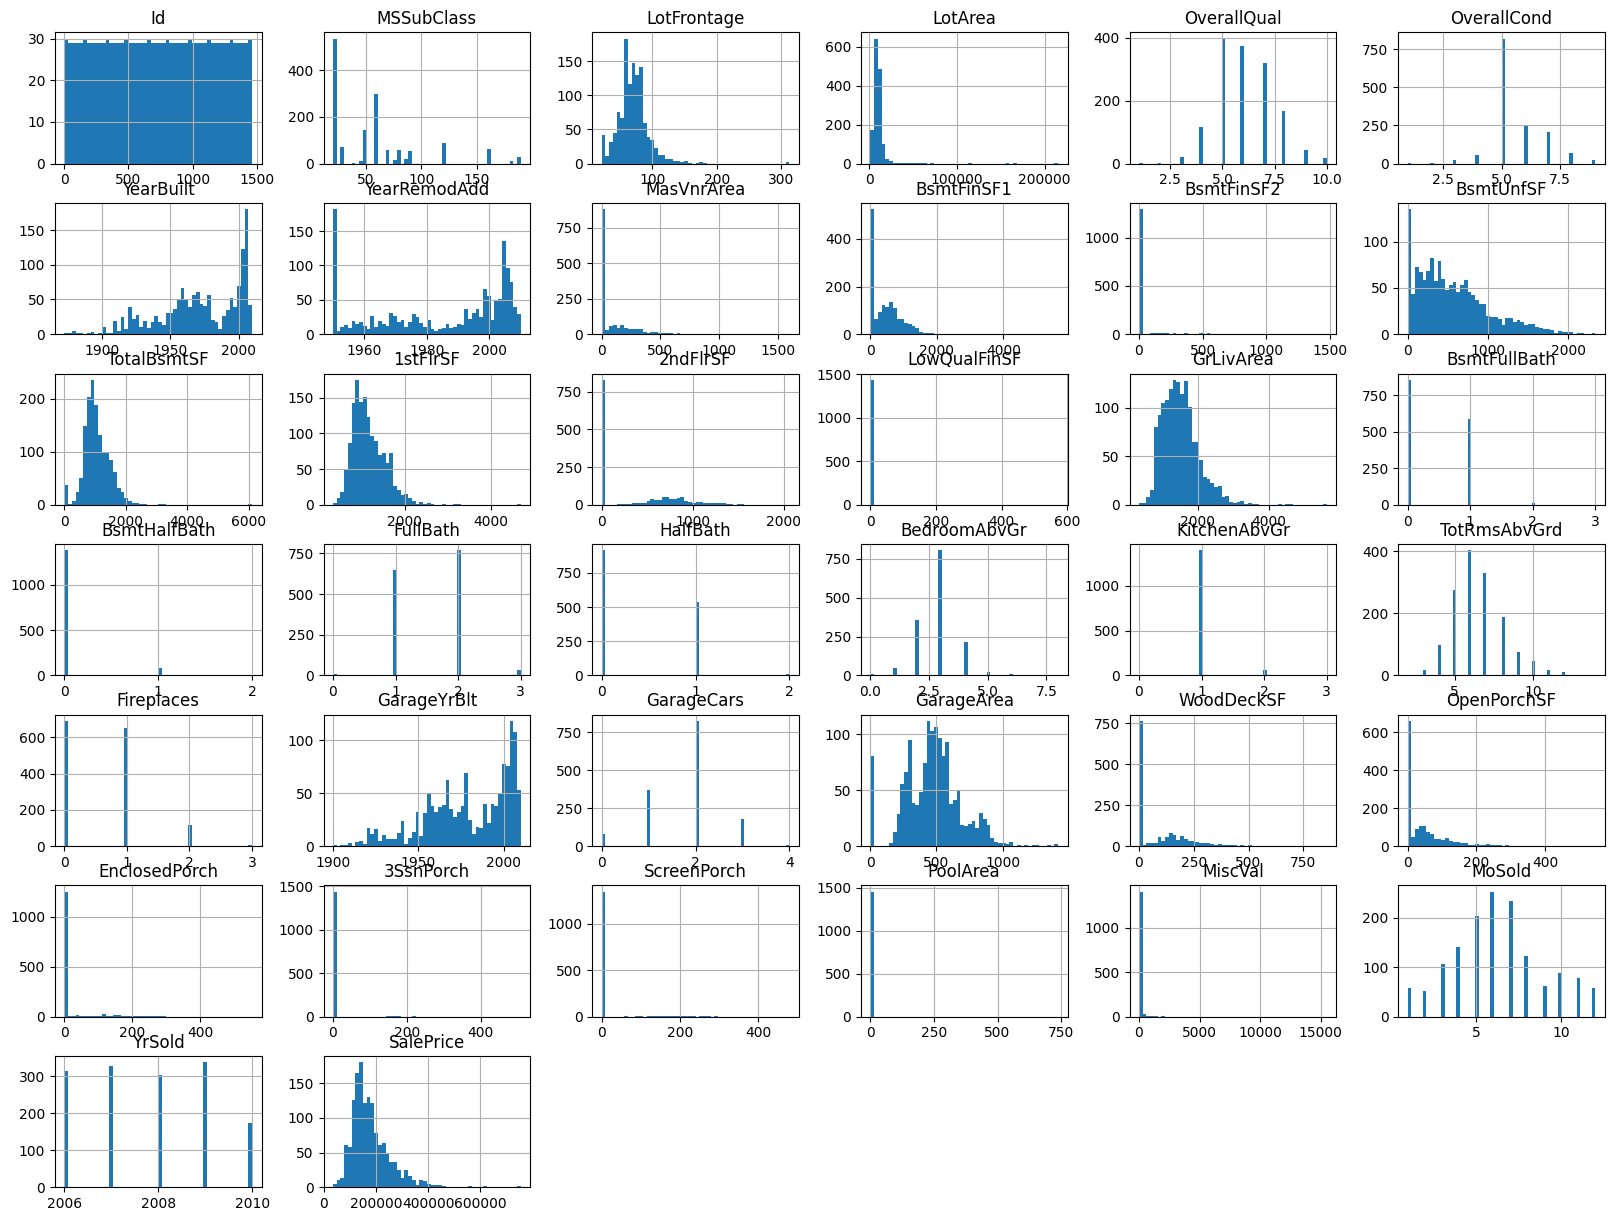

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [64]:
# select only numeric columns from the dataframe
numeric_df = train_data.select_dtypes(include='number')

# compute the correlation matrix
corr = numeric_df.corr()

# display the correlation matrix
print(corr)


                     Id  MSSubClass  LotFrontage   LotArea  OverallQual   
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365  \
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [65]:
corr["YrSold"].sort_values(ascending=False)

YrSold           1.000000
BsmtFullBath     0.067049
OverallCond      0.043950
YearRemodAdd     0.035743
BsmtFinSF2       0.031706
KitchenAbvGr     0.031687
WoodDeckSF       0.022270
3SsnPorch        0.018645
BsmtFinSF1       0.014359
ScreenPorch      0.010694
LotFrontage      0.007450
MiscVal          0.004906
Id               0.000712
GarageYrBlt     -0.001014
MasVnrArea      -0.008201
EnclosedPorch   -0.009916
HalfBath        -0.010269
1stFlrSF        -0.013604
YearBuilt       -0.013618
LotArea         -0.014261
TotalBsmtSF     -0.014969
FullBath        -0.019669
MSSubClass      -0.021407
Fireplaces      -0.024096
OverallQual     -0.027347
GarageArea      -0.027378
2ndFlrSF        -0.028700
LowQualFinSF    -0.028921
SalePrice       -0.028923
TotRmsAbvGrd    -0.034516
BedroomAbvGr    -0.036014
GrLivArea       -0.036526
GarageCars      -0.039117
BsmtUnfSF       -0.041258
BsmtHalfBath    -0.046524
OpenPorchSF     -0.057619
PoolArea        -0.059689
MoSold          -0.145721
Name: YrSold

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

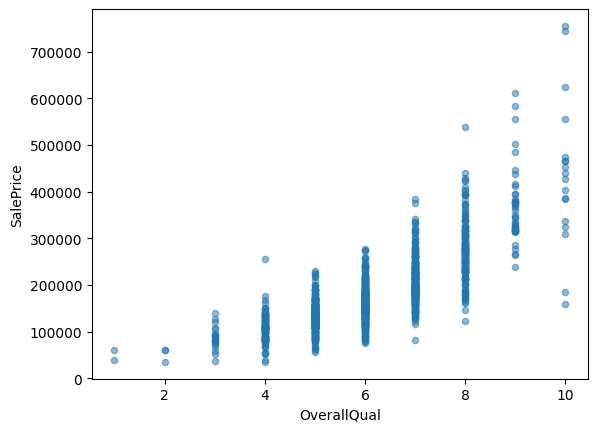

In [66]:
train_data.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

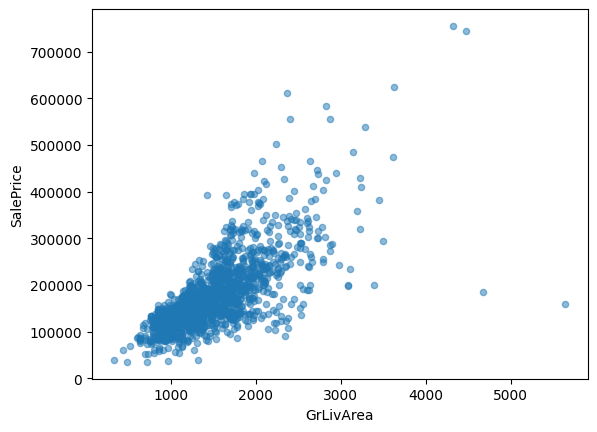

In [68]:
train_data.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

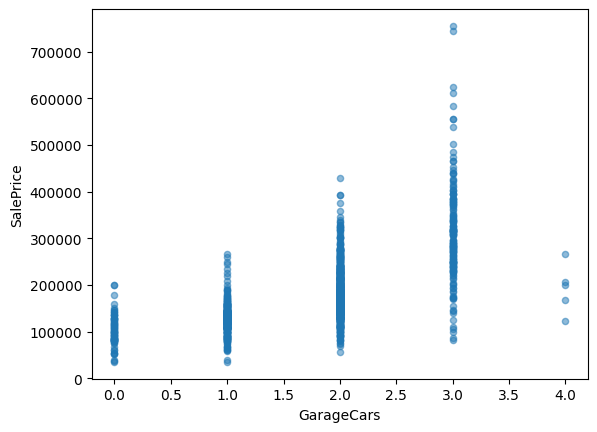

In [69]:
train_data.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)

<Axes: >

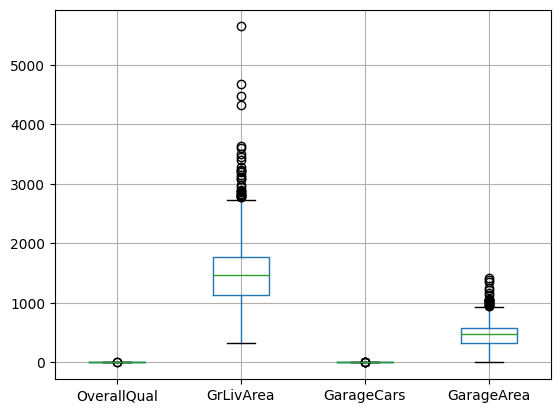

In [70]:
train_data.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

<Axes: >

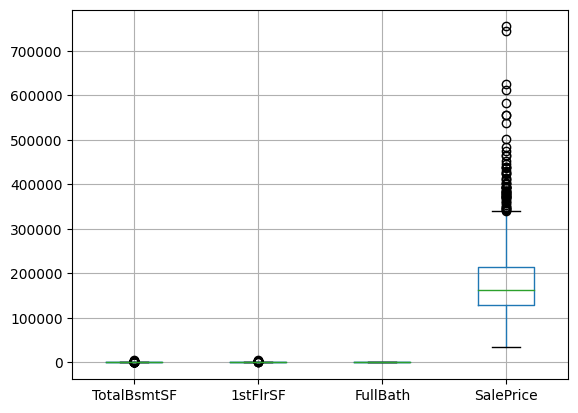

In [71]:
train_data.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

In [72]:
import numpy as np
train_data.fillna(-1000, inplace=True)


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond',
           'LandContour', 
           'RoofStyle', 
           'RoofMatl', 
           'Heating', 
           'MiscFeature', 
           'SaleType', 
           'GarageType',
           'Electrical', 
           'SaleCondition', 
           'Foundation',
           'Exterior1st', 
           'Exterior2nd',
           'MasVnrType', 
           'FireplaceQu', 
           'LotShape', 
           'Neighborhood', 
           'Condition1', 
           'Condition2', 
           'Utilities', 
           'BldgType', 
           'HouseStyle',
           'PoolQC', 
           'BsmtQual', 
           'BsmtCond', 
           'GarageQual',
           'BsmtExposure', 
           'ExterQual', 
           'ExterCond',
           'HeatingQC', 
           'KitchenQual', 
           'BsmtFinType1',
           'BsmtFinType2', 
           'Functional', 
           'Fence', 
           'GarageFinish', 
           'LandSlope',
           'LotShape', 
           'PavedDrive', 
           'Street',
           'Alley', 
           'CentralAir', 
           'MSSubClass', 
           'OverallCond', 
           'YrSold',
           'MoSold', 
           'MSZoning',
           'LotConfig')

In [75]:
for i in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train_data[i].values))
    train_data[i] = encoder.transform(list(train_data[i].values))

In [76]:
for j in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test_data[j].values))
    test_data[j] = encoder_test.transform(list(test_data[j].values))

In [78]:
x_train = train_data[train_data.columns[:80]]
y_train = train_data['YrSold']
x_validation = test_data[test_data.columns[:80]]

In [79]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [81]:
import numpy as np
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
train_data.fillna(-1000, inplace=True)

In [82]:
predicted = regressor.predict(x_train)

In [83]:
predictedValues = pd.DataFrame({"Predicted Values": predicted})
predictedValues

,Predicted Values
0,2.000000e+00
1,1.000000e+00
2,2.000000e+00
3,-1.286334e-13
4,2.000000e+00
...,...
1455,1.000000e+00
1456,4.000000e+00
1457,4.000000e+00
1458,4.000000e+00
